|--- Age <= 28.50
|   |--- class: No
|--- Age >  28.50
|   |--- class: Yes



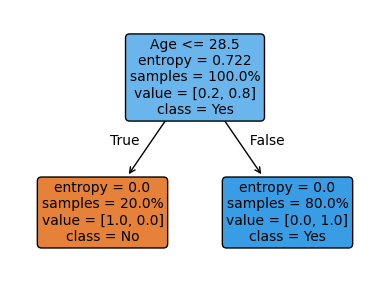


Prediction for (Age=28, Income=50000): No


In [ ]:
# Exercise 1
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Example dataset
data = pd.DataFrame({
    "Age": [25, 32, 47, 51, 62, 23, 36, 44, 53, 48],
    "Income": [40000, 60000, 80000, 110000, 150000, 35000, 62000, 72000, 120000, 95000],
    "Buys_House": ["No", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes"]
})

# Features and target
X = data[["Age", "Income"]]
y = data["Buys_House"]

# Train Decision Tree
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X, y)

# Show rules in text
print(export_text(model, feature_names=list(X.columns)))

# Plot tree with better formatting
plt.figure(figsize=(4,3))
plot_tree(model, feature_names=["Age", "Income"],
          class_names=model.classes_, filled=True, rounded=True,
          proportion=True, fontsize=10)
plt.show()

# Example prediction
sample = pd.DataFrame([[28, 50000]], columns=["Age", "Income"])
print("\nPrediction for (Age=28, Income=50000):", model.predict(sample)[0])


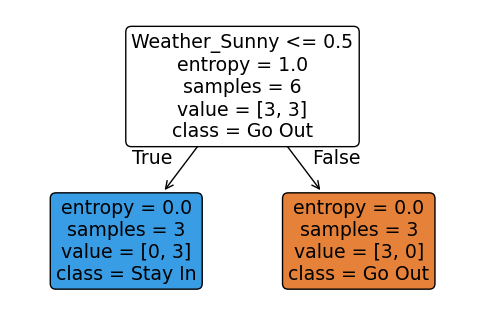

Prediction (Sunny): Stay In
Prediction (Rainy): Go Out


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Exercise 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Example dataset
data = pd.DataFrame({
    "Weather": ["Sunny", "Sunny", "Sunny", "Rainy", "Rainy", "Rainy"],
    "Activity": ["Go Out", "Go Out", "Go Out", "Stay In", "Stay In", "Stay In"]
})

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Features and target
X = data_encoded.drop("Activity_Stay In", axis=1)  # Only keep Weather as feature
y = data_encoded["Activity_Stay In"]  # 1 = Stay In, 0 = Go Out

# Train decision tree
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X, y)

# Plot decision tree
plt.figure(figsize=(6,4))
plot_tree(model, feature_names=X.columns, class_names=["Go Out", "Stay In"],
          filled=True, rounded=True)
plt.show()

# Example predictions
print("Prediction (Sunny):", "Stay In" if model.predict([[0]])[0] else "Go Out")
print("Prediction (Rainy):", "Stay In" if model.predict([[1]])[0] else "Go Out")
